In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
sns.set()

In [9]:
data_train = pd.read_excel("E-Commerce_train.xlsx")
data_test = pd.read_excel("E-Commerce_test.xlsx")
data_train.drop(columns="ID", inplace=True)
data_train["Warehouse_block"].replace({"A":0, "B":1, "C":2,"D":3, "F": 4}, inplace=True)
data_train["Mode_of_Shipment"].replace({"Flight":0, "Ship":1, "Road":2},inplace= True)
data_train["Product_importance"].replace({"low":0, "medium":1,"high":2},inplace= True)
data_train["Gender"].replace({"F":0, "M":1},inplace= True)
data_test["Warehouse_block"].replace({"A":0, "B":1, "C":2,"D":3, "F": 4}, inplace=True)
data_test["Mode_of_Shipment"].replace({"Flight":0, "Ship":1, "Road":2},inplace= True)
data_test["Product_importance"].replace({"low":0, "medium":1,"high":2},inplace= True)
data_test["Gender"].replace({"F":0, "M":1},inplace= True)
data_test.drop(columns='ID', inplace=True)
X = data_train[["Warehouse_block","Mode_of_Shipment","Customer_care_calls","Customer_rating","Cost_of_the_Product","Prior_purchases","Product_importance","Gender","Discount_offered","Weight_in_gms"]]
y = data_train["Reached.on.Time_Y.N"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=60, stratify=y)

In [10]:
clf_xgb = xgb.XGBClassifier(n_estimators=150, use_label_encoder= False, )
clf_xgb.fit(X_train, y_train)
y_train_pred = clf_xgb.predict(X_train)
y_test_pred = clf_xgb.predict(X_test)
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
precision = precision_score(y_test, y_test_pred)
print('Precision sobre test',precision)
exactitud = accuracy_score(y_test, y_test_pred)
print('Accuracy sobre test',exactitud)
precision = recall_score(y_test, y_test_pred,average= None)
print('Recall sobre test',precision)
precision = f1_score(y_test, y_test_pred)
print('F1_Score ', precision)

Accuracy sobre conjunto de Train: 0.9592542289171503
Precision sobre test 0.7623574144486692
Accuracy sobre test 0.6711111111111111
Recall sobre test [0.61890244 0.70104895]
F1_Score  0.7304189435336976


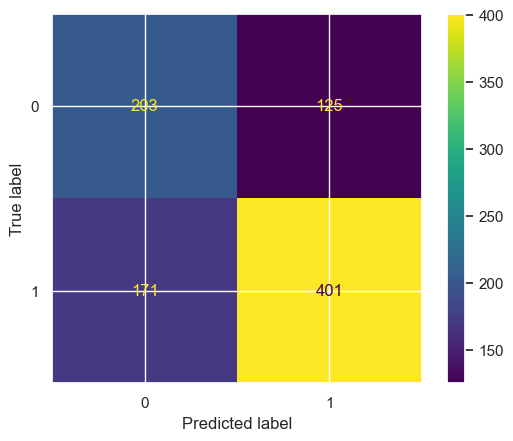

In [11]:
matrix = confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(matrix)
cm_display.plot()
plt.show()

In [6]:
predict_test=clf_xgb.predict(data_test)

In [26]:
predict_test = pd.DataFrame(predict_test,columns=['pred'])
predict_test = predict_test.to_csv('joacota2.csv', index= False)